## GET

In [23]:
import requests
#res = requests.get('https://tw.appledaily.com/new/realtime', verify=False)
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

## HTTP 狀態碼
- https://zh.wikipedia.org/wiki/HTTP%E7%8A%B6%E6%80%81%E7%A0%81

In [24]:
print(dir(res))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [29]:
type(res)

requests.models.Response

In [27]:
#res.text

In [10]:
import speech_recognition
r = speech_recognition.Recognizer()

voice = speech_recognition.AudioFile('/Users/davidchiu/Downloads/out8396308749427800915.wav')
with voice as source:
    audio = r.record(source)

captcha = r.recognize_google(audio, language='en')

In [11]:
captcha

'9475'

## POST

In [12]:
import requests
url = 'http://www.thsrc.com.tw/tw/TimeTable/Search'

payload = {
'StartStationName':  '台北站',
'EndStationName'  :  '新竹站',
'SearchType'  : 'S',
'StartStation': '977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation'  : 'a7a04c89-900b-4798-95a3-c01c455622f4',
'DepartueSearchDate': '2018/10/30',
'DepartueSearchTime': '12:00',    
    
} 

res = requests.post(url, data = payload)

In [13]:
res

<Response [200]>

In [20]:
#res.text
jd = res.json()
import pandas
df = pandas.DataFrame(jd['data']['DepartureTable']['TrainItem'])

In [22]:
df.head(1)

,DepartureTime,DestinationTime,Discount,Duration,NonReservedCar,Note,Sequence,StationInfo,TrainNumber
0,06:26,07:00,[{'Id': '68d9fc7b-7330-44c2-962a-74bc47d2ee8a'...,00:34,4,,0,"[{'StationNo': '01', 'StationName': '南港站', 'De...",0803


## BeautifulSoup4

In [28]:
from bs4 import BeautifulSoup 

html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'lxml')
print(soup.text)




Hello World
This is link1
This is link2




In [30]:
type(soup)

bs4.BeautifulSoup

In [32]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [33]:
soup.select_one('h1').text

'Hello World'

In [35]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [36]:
soup.select_one('a').text

'This is link1'

In [38]:
type(soup.select_one('a'))

bs4.element.Tag

In [39]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [40]:
type(soup.select('a'))

list

In [41]:
soup.select('a')[0]

<a class="link" href="#">This is link1</a>

In [42]:
soup.select('a')[0].text

'This is link1'

In [43]:
soup.select('a')[1]

<a class="link" href="# link2">This is link2</a>

In [44]:
soup.select('a')[1].text

'This is link2'

In [46]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [47]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [49]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [51]:
soup.select_one('body #title')

<h1 id="title">Hello World</h1>

In [52]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [53]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [55]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [56]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [57]:
for link in soup.select('body a.link'):
    print(link.text)

This is link1
This is link2


In [59]:
for link in soup.select('body a.link'):
    print(link.get('href'))

#
# link2


In [60]:
a = '<a href="https://www.largitdata.com" data-attr="qoo" data-whatever="oop">largitdata</a>'

In [61]:
s2 = BeautifulSoup(a, 'lxml')

In [63]:
s2.select_one('a').get('data-attr')

'qoo'

In [64]:
s2.select_one('a').get('data-whatever')

'oop'

In [65]:
s2.select_one('a').get('href')

'https://www.largitdata.com'

## 簡單的匯率爬取程序

In [76]:
import requests
headers = {
'Cookie': 'JSESSIONID=NTDCbT3FyYb1dyFJkRhDqr6kv1jwRmQNHhJp20JJ6bCQJ4LM6sMt!-215875682!1540568881812; ineb_browse_history=TW_RB_TX_ebank_049341:TW_RB_TX_ebank_049341:TW_RB_TX_ebank_026941:TW_RB_TX_ebank_026941:TW_RB_TX_ebank_470195:TW_RB_TX_ebank_026941:TW_RB_TX_ebank_049341:TW_RB_TX_ebank_026941:TW_RB_TX_ebank_470195:TW_RB_TX_ebank_470195; _ga=GA1.2.1814953450.1525263360; BIGipServer~RBIT~INEB_POOL_WEB=!dc6QVu332D5jiA6u8oTajfYXJZVovXOZW6fIPRw3+IlxuX8GxdWeVtIMvrS/I6b56Oc6p64Zjg3e; BIGipServer~RBIT~INEB_POOL_AP=!0yo2ObCJElxaM4Su8oTajfYXJZVovQsYOKWD7MJoAcKBl8VOyzKcjpXlm0JCqU2MaFpQH/jKzXMzTw==; TS01649781=01c2a9c2b9f0bbbb851b20c8b36851e5fcaf996243f07caca45d2a097757a907ac18313114b464fafd8bd30d5e7cbd34f7d9677f03fee81a292b956ca7cf1b80d255f520ff8c069e023a38bd1fe3783df0baac9b55090bad569f6836c2cbeb8637cc200535d0d5f995e9f5ce7488388930f7511af8c670f4b45de2f468821f5cb98f121ec660af911f7843ac40105e613581c498fdcc7a12fce502e87cbefab3693f62dfed; _gid=GA1.2.872421050.1540778223; EBANKSID=BH5PbWDLpWvrN1WVNvZ1tg5VQfxJ67HxB2vygGYcC3GH5spS03xW!-215875682; TS01f8e2a2=01c2a9c2b9018f53e8a85b36bd30a1a97c43173879c6365a411c1056739cec0d64a8274b34f50ff9b1d0d4b904f2e5c547a449ede4681ffe56c43b66d05981b2792a46c5aca5426bf025ffd02d63df2877fa3ae9156b4750e83bc044de8aad62cd935fd818a362437075aa6a87998328837e79ad054850ed5e0691d15ffc3758a70ca6e24b; _gat=1',    
'Referer': 'https://www.ctbcbank.com/CTCBPortalWeb/appmanager/ebank/rb',    
'X-Requested-With': 'XMLHttpRequest',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'  
}
res = requests.get('https://www.ctbcbank.com/CTCBPortalWeb/pages/invest/exchangeRateInfoDetials.jsf?_=1540785134388', headers = headers)

In [85]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
print(soup.select_one('.rate_table .column_text').text.strip())
print(soup.select_one('.rate_table .column_text2').text.strip())

美元
30.9250


## 蘋果網路爬蟲

In [86]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [87]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [89]:
len(soup.select('a'))

159

In [91]:
len(soup.select('li.rtddt a'))

30

In [106]:
for news in soup.select('.rtddt a'):
    title    = news.select_one('h1').text
    category = news.select_one('h2').text
    dt       = news.select_one('time').text
    link     = news.get('href')
    #print(news.select('h1')[0])
    print(title, category, dt, link)
    print('============================')

【普悠瑪司機】尤振仲住院8天今出院　女兒...(19615) 社會 13:05 https://tw.news.appledaily.com/local/realtime/20181029/1456153/
「不想繼續幫韓國瑜造勢」　綠委低調不評論... 政治 13:05 https://tw.news.appledaily.com/politics/realtime/20181029/1456259/
【普悠瑪調查】剩今天！司機員50萬交保檢...(6120) 社會 13:04 https://tw.news.appledaily.com/local/realtime/20181029/1456121/
【記者會全文】邱議瑩反擊：陪睡政見是韓國...(73960) 政治 13:02 https://tw.news.appledaily.com/politics/realtime/20181029/1456125/
【小型運動休旅】6夯車省油比一比　有3輛...(14611) 3C 13:02 https://tw.lifestyle.appledaily.com/gadget/realtime/20181029/1456074/
〈雙姝爭后1〉Sandy搶《聲林之王》主... 壹週刊 13:00 https://tw.news.appledaily.com/nextmag/realtime/20181029/1456211/
​〈雙姝爭后2〉吳宗憲聯手女兒Sandy... 壹週刊 13:00 https://tw.news.appledaily.com/nextmag/realtime/20181029/1456212/
​〈雙姝爭后3〉漲價or靠自己 綜藝天王... 壹週刊 13:00 https://tw.news.appledaily.com/nextmag/realtime/20181029/1456216/
【獨家】白家綺新婚9天被爆戀過汪建民　甜... 娛樂 12:58 https://tw.entertainment.appledaily.com/realtime/20181029/1456202/
台鐵新局長張政源自願從政次降任　月薪少了...(4317) 政治 12:55 https://tw.news.appledaily.com/politi

In [107]:
news_ary = []
for news in soup.select('.rtddt a'):
    data     = {} 
    data['title']    = news.select_one('h1').text
    data['category'] = news.select_one('h2').text
    data['dt']       = news.select_one('time').text
    data['link']     = news.get('href')
    news_ary.append(data)

In [110]:
import pandas
df = pandas.DataFrame(news_ary)
df.to_excel('applenews.xlsx')

## 抓取內文細節

In [111]:
import requests
res = requests.get('https://tw.news.appledaily.com/nextmag/realtime/20181029/1456211/')
res

<Response [200]>

In [112]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [116]:
print(soup.select_one('h1').text)

〈雙姝爭后1〉Sandy搶《聲林之王》主持　慘遭Lulu攔胡【壹點就報】


In [118]:
soup.select_one('.ndArticle_margin p').text

'看本篇完整版內容，請點以下連結：〈雙姝爭后1〉Sandy搶《聲林之王》主持\u3000慘遭Lulu攔胡【壹點就報】已播出3集的東森《聲林之王》，是台灣第一個仿照中國大舞台大製作的歌唱節目。有工作人員向《壹週刊》爆料，吳姍儒（Sandy）很想主持這節目，得知後，大力推荐自己，主動跟東森溝通，不料製作單位遲遲未回覆，又透過她老爸吳宗憲（憲哥）說項，令憲哥好友王令麟左右為難。工作人員還透露，當初《聲林之王》在尋覓主持人時，製作人王偉忠覺得主持人會唱歌還是較好，基於須找「合乎節目調性，也能對參賽者給意見」的主持人，因此堅持用發過EP《LuLu，腿》、《可以》和專輯《美小鴨》的Lulu（黃路梓茵），Sandy因此錯失機會...(點我看全文)更多壹週刊報導〈雙姝爭后1〉Sandy搶《聲林之王》主持\u3000慘遭Lulu攔胡【壹點就報】〈雙姝爭后2〉吳宗憲聯手女兒Sandy\u3000拿下購物台千萬代言【壹點就報】〈雙姝爭后3〉漲價or靠自己\u3000綜藝天王星二代大不同 【壹點就報】◎你投訴‧壹週刊幫你爆料\xa0《壹週刊APP》全新改版！完全免費！快點下載一起掌握新聞！>>IOS下載 https://goo.gl/G3jADF>>android下載 https://goo.gl/5fGOAI\xa0'

In [120]:
soup.select_one('.ndArticle_creat').text

'出版時間：2018/10/29 13:00'

In [122]:
from datetime import datetime 
current_time = datetime.now()

In [123]:
type(current_time)

datetime.datetime

## Datetime Module
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [124]:
# strftime => convert time to string
current_time.strftime('%Y-%m-%d')

'2018-10-29'

In [125]:
current_time.strftime('%Y-%m-%d %B %A')

'2018-10-29 October Monday'

In [128]:
# strptime => convert string to datetime
a = '2018/10/29 13:00'
datetime.strptime(a, '%Y/%m/%d %H:%M')

datetime.datetime(2018, 10, 29, 13, 0)

In [131]:
birth = '1994/5/3 00:00'
current_time - datetime.strptime(birth, '%Y/%m/%d %H:%M')

datetime.timedelta(8945, 50344, 830297)

In [138]:
from datetime import timedelta
current_time + timedelta(days = 5)

datetime.datetime(2018, 11, 3, 13, 59, 4, 830297)

In [140]:
for i in range(1,5):
    #print(current_time + timedelta(days = i))
    print((current_time + timedelta(days = i)).strftime('%Y/%m/%d'))

2018/10/30
2018/10/31
2018/11/01
2018/11/02


In [142]:
dt = soup.select_one('.ndArticle_creat').text
datetime.strptime(dt, '出版時間：%Y/%m/%d %H:%M')

datetime.datetime(2018, 10, 29, 13, 0)

In [150]:
view_cnt = int(soup.select_one('.ndArticle_view').text)
view_cnt

1111

In [155]:
category = soup.select('.current')[1].text
category

'壹週刊'

In [160]:

def getDetail(url):
    res   = requests.get(url)
    soup  = BeautifulSoup(res.text, 'lxml')
    title   = soup.select_one('h1').text
    content = soup.select_one('.ndArticle_margin p').text
    dt = soup.select_one('.ndArticle_creat').text
    dt = datetime.strptime(dt, '出版時間：%Y/%m/%d %H:%M')
    
    if soup.select_one('.ndArticle_view'):
        view_cnt = int(soup.select_one('.ndArticle_view').text)
        
    category = soup.select('.current')[1].text
    return {'title':title, 'content':content, 'dt':dt, 
            'view_cnt':view_cnt, 'category': category}

In [157]:
getDetail('https://tw.news.appledaily.com/nextmag/realtime/20181029/1456211/')

{'category': '壹週刊',
 'content': '看本篇完整版內容，請點以下連結：〈雙姝爭后1〉Sandy搶《聲林之王》主持\u3000慘遭Lulu攔胡【壹點就報】已播出3集的東森《聲林之王》，是台灣第一個仿照中國大舞台大製作的歌唱節目。有工作人員向《壹週刊》爆料，吳姍儒（Sandy）很想主持這節目，得知後，大力推荐自己，主動跟東森溝通，不料製作單位遲遲未回覆，又透過她老爸吳宗憲（憲哥）說項，令憲哥好友王令麟左右為難。工作人員還透露，當初《聲林之王》在尋覓主持人時，製作人王偉忠覺得主持人會唱歌還是較好，基於須找「合乎節目調性，也能對參賽者給意見」的主持人，因此堅持用發過EP《LuLu，腿》、《可以》和專輯《美小鴨》的Lulu（黃路梓茵），Sandy因此錯失機會...(點我看全文)更多壹週刊報導〈雙姝爭后1〉Sandy搶《聲林之王》主持\u3000慘遭Lulu攔胡【壹點就報】〈雙姝爭后2〉吳宗憲聯手女兒Sandy\u3000拿下購物台千萬代言【壹點就報】〈雙姝爭后3〉漲價or靠自己\u3000綜藝天王星二代大不同 【壹點就報】◎你投訴‧壹週刊幫你爆料\xa0《壹週刊APP》全新改版！完全免費！快點下載一起掌握新聞！>>IOS下載 https://goo.gl/G3jADF>>android下載 https://goo.gl/5fGOAI\xa0',
 'dt': datetime.datetime(2018, 10, 29, 13, 0),
 'title': '〈雙姝爭后1〉Sandy搶《聲林之王》主持\u3000慘遭Lulu攔胡【壹點就報】',
 'view_cnt': 1706}

In [161]:
getDetail('https://tw.news.appledaily.com/politics/realtime/20181029/1456312/')

AttributeError: 'NoneType' object has no attribute 'text'

In [164]:
soup.select_one('qoo')

In [170]:
a = 5
a = False
a = None
a = []
a = ['1']
if a:
    print('printing')

printing


In [171]:

def getDetail(url):
    ret   = {}
    res   = requests.get(url)
    soup  = BeautifulSoup(res.text, 'lxml')
    ret['title']   = soup.select_one('h1').text
    ret['content'] = soup.select_one('.ndArticle_margin p').text
    dt = soup.select_one('.ndArticle_creat').text
    ret['dt'] = datetime.strptime(dt, '出版時間：%Y/%m/%d %H:%M')
    
    if soup.select_one('.ndArticle_view'):
        ret['view_cnt'] = int(soup.select_one('.ndArticle_view').text)
        
    ret['category'] = soup.select('.current')[1].text
    return ret

In [172]:
getDetail('https://tw.news.appledaily.com/politics/realtime/20181029/1456312/')

{'category': '政治',
 'content': '前總統馬英九今天到嘉義縣朴子市為國民黨縣長候選人吳育仁輔選，馬英九再提核能發電問題，馬英九說，民進黨政府廢核，還把核四燃料棒送到美國拍賣，真是荒蓎政策。\xa0嘉義縣朴子市上周六發生空污褐爆問題嚴重，縣長參選人吳育仁今天在朴子掃街時，特別提及民進黨電力政策完全錯誤，才會導致朴子地區空氣污染嚴重，吳育仁說，他主張以核養綠，拒絕用肺發電，嘉義縣老人多，空污影響老幼最嚴重。\xa0馬英九說，核綠應該併存，用核能發展綠能，到目前核電還是世界上最乾淨的能源，等到有一天綠能發展成熟，再廢核，就如同找工作一樣，總要騎馬找馬，但民進黨政府卻主張廢核，還將核四燃料棒送回美國拍賣，如同棄馬殺馬，讓他這個姓馬的，真是情何以堪。\xa0馬英九在吳育仁及朴子市在地議員李國勝等人陪同下到朴子市第二市場掃街拜票，馬英九的熱度已大不如從前，沿途除了國安人員和警察外，已少有粉絲追隨，不過仍有民眾因為很少看過馬英九本尊，邀馬英九一同合照留作紀念。\xa0而今天上午馬英九在朴子市拜票後，將轉往嘉義市陪同市長候選人黃敏惠掃街拜票。而今天下午3時高雄市長候選人韓國瑜將到嘉義縣黨部參加造勢大會，韓流能否在嘉義縣出現外溢效應，值得進一步觀察。（王智勇／嘉義報導）距離11月24日九合一選戰，只剩倒數最後一個月！想看最激烈的選戰實況、最精闢的選情評估、最完整的政見分析，敬請鎖定「蘋果日報九合一選舉爭霸戰」。網址：https://tw.feature.appledaily.com/election2018/',
 'dt': datetime.datetime(2018, 10, 29, 14, 25),
 'title': '馬英九陪吳育仁掃街\u3000批民進黨廢核政策錯誤'}

In [173]:

def getDetail(url):
    ret   = {}
    try:
        res   = requests.get(url)
        soup  = BeautifulSoup(res.text, 'lxml')
        ret['title']   = soup.select_one('h1').text
        ret['content'] = soup.select_one('.ndArticle_margin p').text
        dt = soup.select_one('.ndArticle_creat').text
        ret['dt'] = datetime.strptime(dt, '出版時間：%Y/%m/%d %H:%M')

        if soup.select_one('.ndArticle_view'):
            ret['view_cnt'] = int(soup.select_one('.ndArticle_view').text)

        ret['category'] = soup.select('.current')[1].text
    except:
        print(url)
    return ret

### 請根據列表頁的連結抓取內文資料

In [176]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.appledaily.com/new/realtime')
soup = BeautifulSoup(res.text, 'lxml')
news_ary = []
for news in soup.select('.rtddt a'):
    news_ary.append(getDetail(news.get('href')))
    #print('====================')

## 將蘋果新聞前五頁的內文抓取下來

In [182]:
newsurl = 'https://tw.appledaily.com/new/realtime/{}'
news_ary = []
for i in range(1,6):
    #print(newsurl.format(i))
    res = requests.get(newsurl.format(i))
    soup = BeautifulSoup(res.text, 'lxml')
    for news in soup.select('.rtddt a'):
        news_ary.append(getDetail(news.get('href')))

In [183]:
import pandas
newsdf = pandas.DataFrame(news_ary)

In [188]:
# SELECT * FROM newsdf ORDER BY view_cnt DESC LIMIT 3
newsdf.sort_values('view_cnt', ascending=False).head(3)

,category,content,dt,title,view_cnt
60,生活,（更新：新增醫師說明)比特犬是農委會公告具攻擊性犬隻。高醫附設醫院接獲一對陳姓父女兩個月內三...,2018-10-29 13:47:00,恐怖！比特犬三度咬傷父女飼主 「棉花棒可穿過傷口」,306962.0
13,國際,印尼廉價航空「獅子航空」（Lion Air)一架國內班機今晨起飛後不久便與塔台失聯，當地救難...,2018-10-29 14:50:00,【不斷更新】獅航189人客機墜海 已發現人體屍骸,193277.0
108,政治,（更新：新增韓國瑜回應）國民黨高雄市長參選人韓國瑜日前出席姊妹挺韓國瑜成立大會時，陳述招商理...,2018-10-29 12:28:00,【最即時專題1】「老婆讓韓國瑜睡一晚」 邱議瑩不認失言：該譴責的是韓國瑜,158458.0


In [192]:
#SELECT catetegory, sum(view_cnt) FROM newsdf GROUP BY category ORDER BY sum(view_cnt) DESC
newsdf.groupby('category')['view_cnt'].sum().sort_values(ascending=False)

category
生活      550450.0
社會      387186.0
政治      386956.0
娛樂時尚    293325.0
國際      228119.0
體育      103338.0
財經地產     70214.0
3C車市     31226.0
吃喝玩樂      8994.0
壹週刊       8945.0
論壇        6445.0
Name: view_cnt, dtype: float64

In [196]:
idx = newsdf.groupby('category')['view_cnt'].transform(max) == newsdf['view_cnt']

In [199]:
newsdf[idx].head(3)

,category,content,dt,title,view_cnt
4,社會,（更新：增加嫌犯前科案情）疑因借2千元不成，就在成大校園殘忍殺害陳姓女研究生的兇嫌林榮富，就...,2018-10-29 15:01:00,【成大命案】兇嫌起底！16年前曾勒脖襲胸 強制猥褻判8月,64856.0
13,國際,印尼廉價航空「獅子航空」（Lion Air)一架國內班機今晨起飛後不久便與塔台失聯，當地救難...,2018-10-29 14:50:00,【不斷更新】獅航189人客機墜海 已發現人體屍骸,193277.0
58,體育,(新增影片)(更新比賽過程)11:17紅襪今天單場4轟，其中皮爾斯雙響砲，貝茲、馬丁尼茲各貢...,2018-10-29 13:52:00,【世界大賽】紅襪4轟5:1勝道奇 隊史第9次封王,56829.0


In [200]:
newsdf.to_excel('appledaily.xlsx')

In [227]:
import speech_recognition

def listenTo():
    r = speech_recognition.Recognizer()

    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)
    return r.recognize_google(audio, language='zh-TW')

In [222]:
import requests
term = 'AKB48'
res = requests.get('https://www.google.com.tw/search?rlz=1C5CHFA_enTW718TW718&biw=727&bih=406&tbm=isch&sa=1&ei=17fWW9fuCcKY8QXfsKbwDg&q={}&oq={}&gs_l=img.3...4698.5996.0.6554.0.0.0.0.0.0.0.0..0.0....0...1c.1j4.64.img..0.0.0....0.5idwlwCM2yw'.format(term, term))

In [223]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
imgurl = soup.select_one('img').get('src')
res2   = requests.get(imgurl)
with open('1.jpg', 'wb') as f:
    f.write(res2.content)

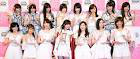

In [224]:
from PIL import Image
Image.open('1.jpg')

In [240]:
import requests
from bs4 import BeautifulSoup

def getPicture(term):
    res = requests.get('https://www.google.com.tw/search?rlz=1C5CHFA_enTW718TW718&biw=727&bih=406&tbm=isch&sa=1&ei=17fWW9fuCcKY8QXfsKbwDg&q={}&oq={}&gs_l=img.3...4698.5996.0.6554.0.0.0.0.0.0.0.0..0.0....0...1c.1j4.64.img..0.0.0....0.5idwlwCM2yw'.format(term, term))
    
    soup = BeautifulSoup(res.text, 'lxml')
    imgurl = soup.select_one('img').get('src')
    res2   = requests.get(imgurl)
    with open('1.jpg', 'wb') as f:
        f.write(res2.content)
    im = Image.open('1.jpg')
    im.show()
    #Image.show()

In [243]:
getPicture(listenTo())